#  **Titanic Survival Predication**

## Importing Neccessary Liabraies


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Titanic Dataset


In [ ]:
data = pd.read_csv('/content/Titanic-Dataset.csv')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Checking the NaN value in the dataset
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


### Dropping Unnecessary Columns

In [ ]:
# To removes the "Cabin" column from the dataset as it has too many missing values.
data = data.drop(['Cabin'],axis =1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


##Exploratory Data Analysis (EDA)
This section focuses on understanding the dataset through various visualizations.

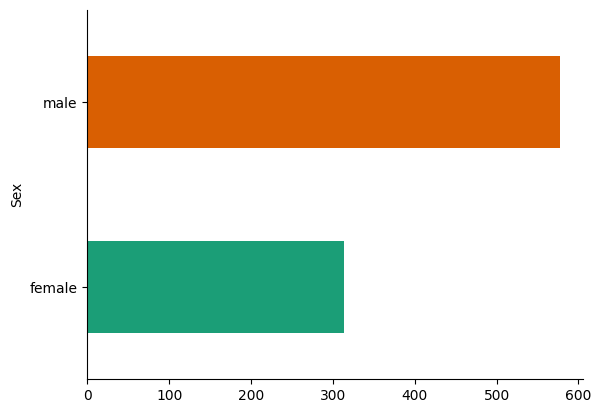

In [ ]:
# To visualizes the distribution of passengers by gender.
data.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='Survived', ylabel='count'>

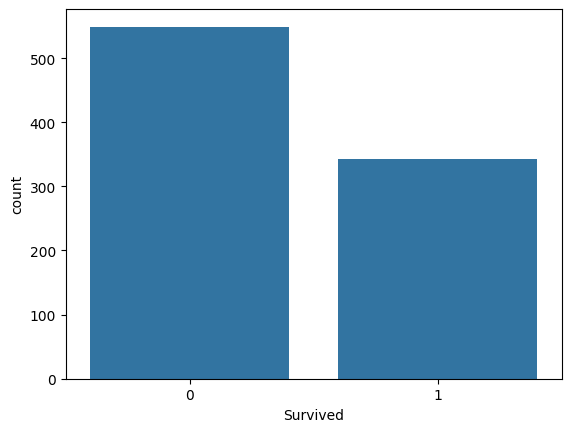

In [ ]:
# To visualizes the count of survivors vs non-survivors.
sns.countplot(x=  'Survived',data = data)

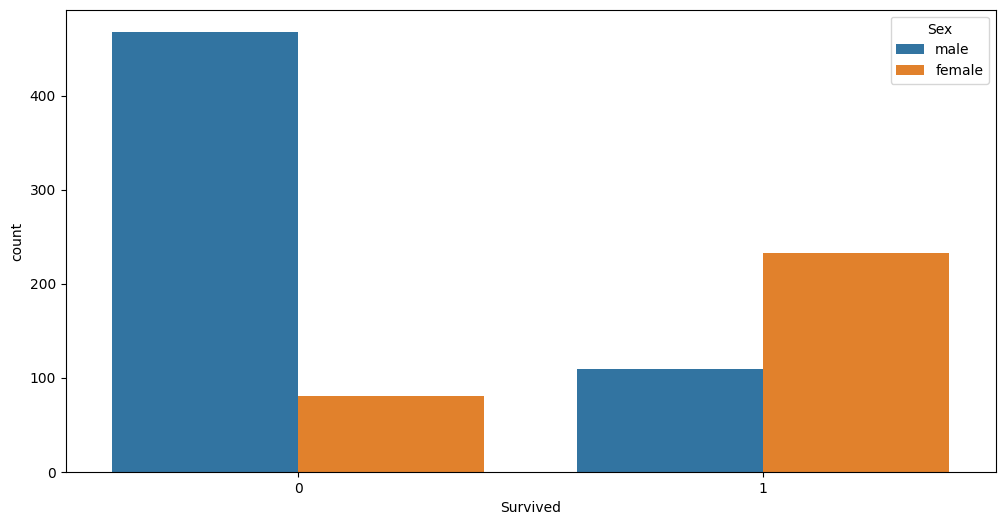

In [ ]:
# To visualizes survival rates categorized by gender.
plt.figure(figsize=(12,6))
sns.countplot(x = 'Survived',hue ='Sex',data = data)
plt.show()

In [ ]:
# Filling NaN values in the Age column
data = data.fillna(data['Age'].mean())



In [ ]:
data['Age'].isnull().sum()

0

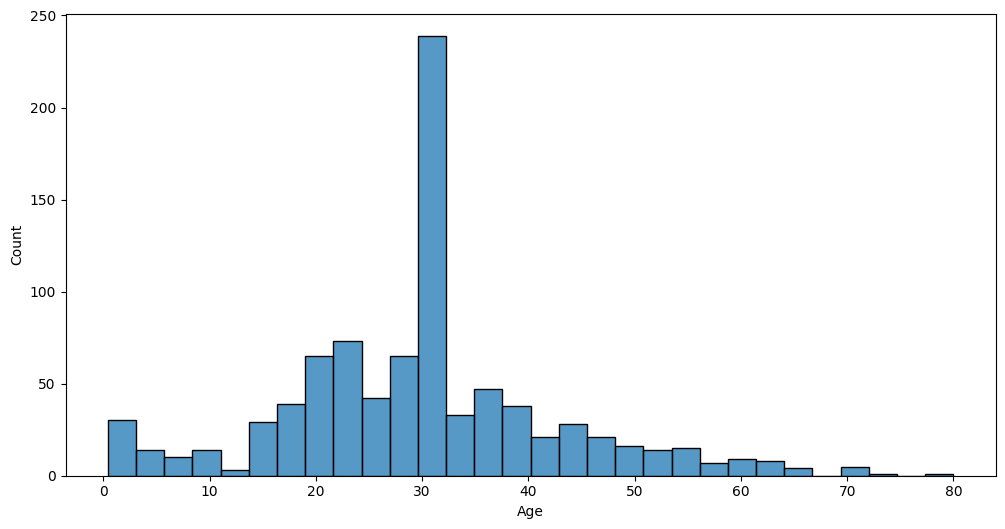

In [ ]:
# Histogram plot of age column to check distrubtion of age in data
plt.figure(figsize=(12,6))
sns.histplot(data['Age'],kde=False)
plt.show( )

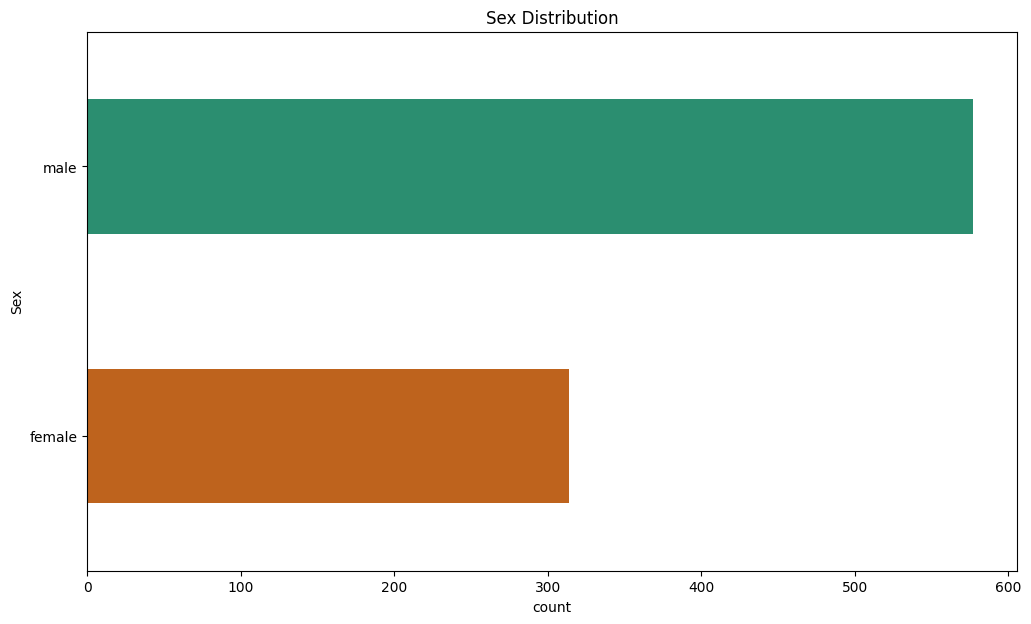

In [ ]:
# Distrubution of Gender/Sex in whole data
plt.figure(figsize=(12,7))
sns.countplot(y='Sex',hue = 'Sex',data = data,palette = 'Dark2',width = 0.5)
plt.title('Sex Distribution')
plt.show()

In [ ]:
data['Parch'].nunique()

7

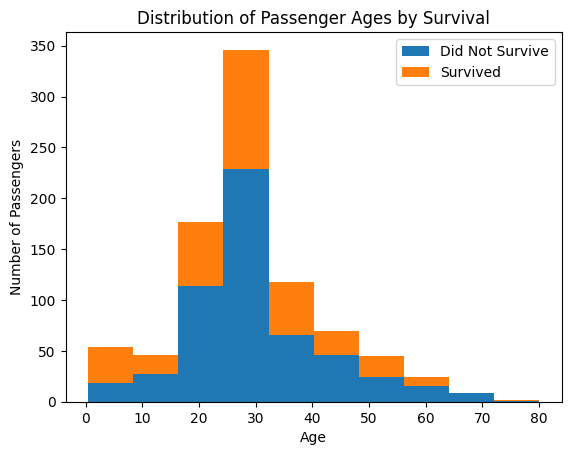

In [ ]:
# Distribution of Passengers on basis of age whether they survived or not
plt.hist([data[data['Survived'] == 0]['Age'], data[data['Survived'] == 1]['Age']],
         bins=10, label=['Did Not Survive', 'Survived'], stacked=True)
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Distribution of Passenger Ages by Survival')
_ = plt.legend()

Text(0.5, 1.0, 'Distribution of Passenger Pclass by Survival')

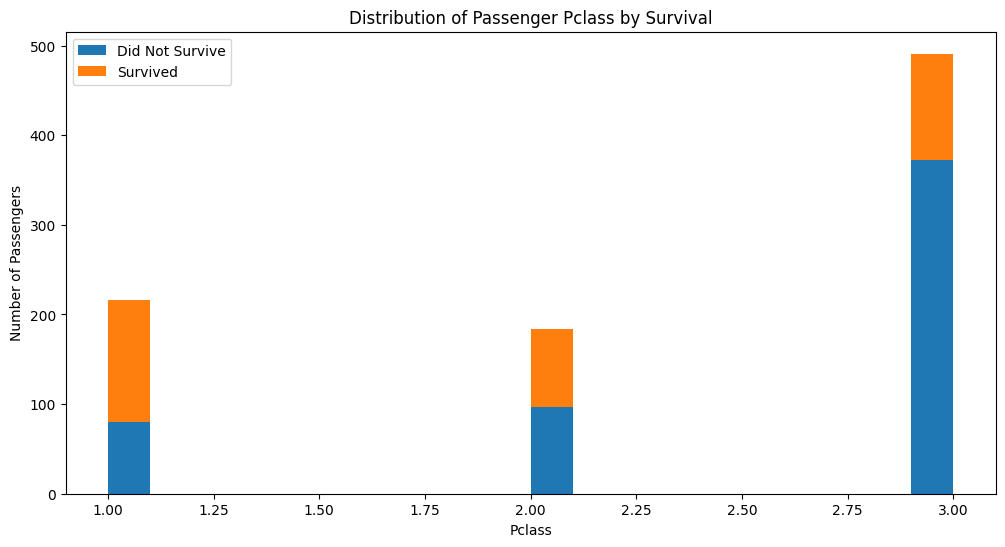

In [ ]:
# Distribution of Passenger Survival based on their Class
plt.figure(figsize=(12,6))
plt.hist([data[data['Survived']==0]['Pclass'],data[data['Survived']==1]['Pclass']],bins = 20 ,label =['Did Not Survive','Survived'],stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Number of Passengers')
plt.legend()
plt.title('Distribution of Passenger Pclass by Survival')

In [ ]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

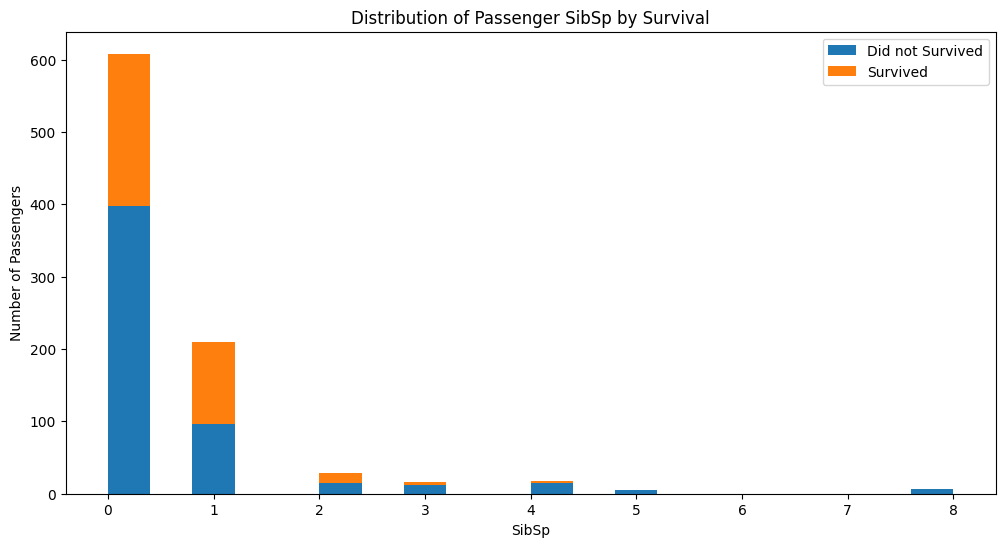

In [ ]:
#Distribution of passenger survival on basis of Sibling spouse numbers
plt.figure(figsize=(12,6))
plt.hist([data[data['Survived']==0]['SibSp'],data[data['Survived']==1]['SibSp']],bins = 20 , label =['Did not Survived','Survived'],stacked = True)
plt.xlabel('SibSp')
plt.ylabel('Number of Passengers')
plt.legend()
plt.title('Distribution of Passenger SibSp by Survival')
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

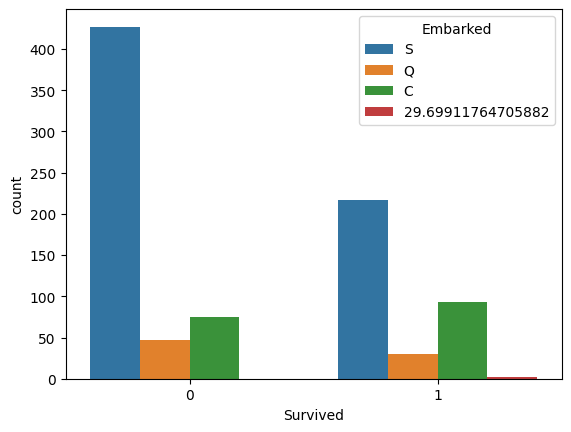

In [ ]:
sns.countplot(x ='Survived',hue = 'Embarked',data= data)

<Axes: >

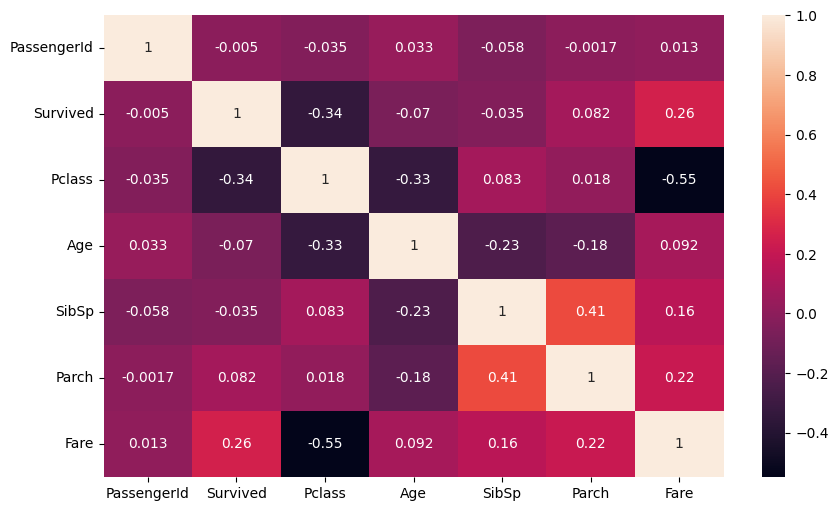

In [ ]:
# To creates a heatmap to display correlations between different numerical features in the dataset.
plt.figure(figsize=(10,6))
sns.heatmap((data.select_dtypes(exclude =['object'])).corr(),annot = True)

In [ ]:
# Correlation of different features with Survived column/feature
correlation = abs(pd.DataFrame((data.select_dtypes(exclude='object')).corr()['Survived']))
correlation.sort_values(by = 'Survived',ascending = False)

,Survived
Survived,1.000000
Pclass,0.338481
Fare,0.257307
Parch,0.081629
Age,0.069809
SibSp,0.035322
PassengerId,0.005007


<Figure size 1200x300 with 0 Axes>

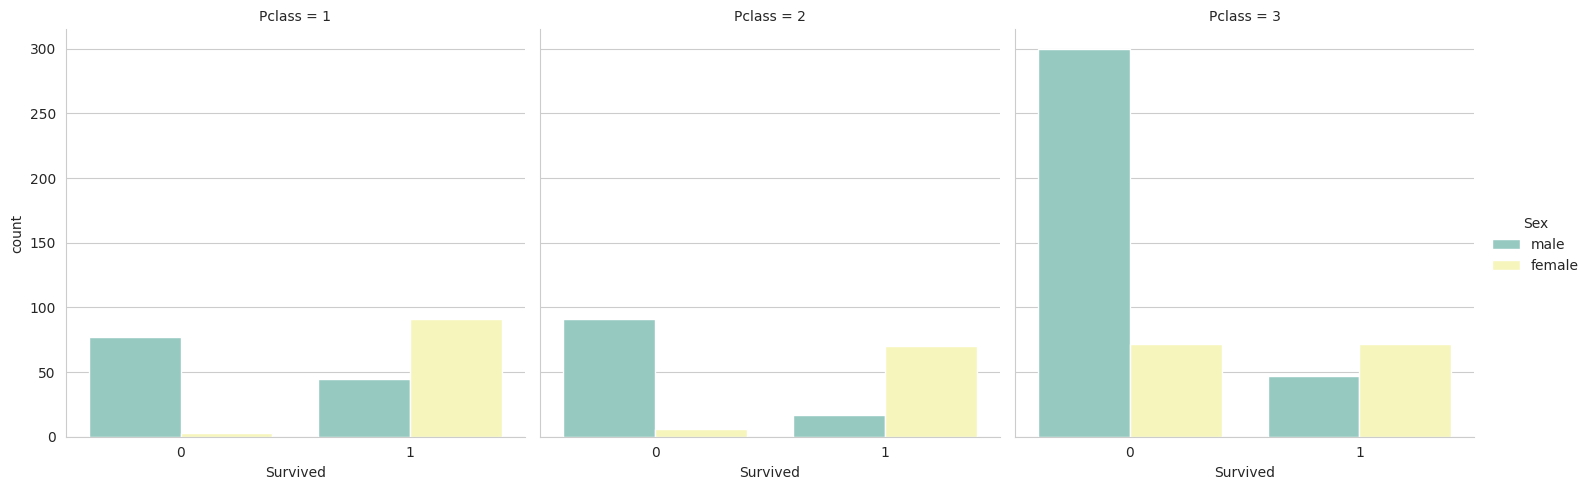

In [ ]:
plt.figure(figsize=(12, 3))
sns.set_style('whitegrid')
sns.catplot(x='Survived', col='Pclass', hue = 'Sex', kind='count', data=data,palette="Set3");
plt.show()

<ipython-input-23-fe71c2a28931>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Survived', col='Embarked', kind='count', data=data,palette="Set3");


<Figure size 1200x300 with 0 Axes>

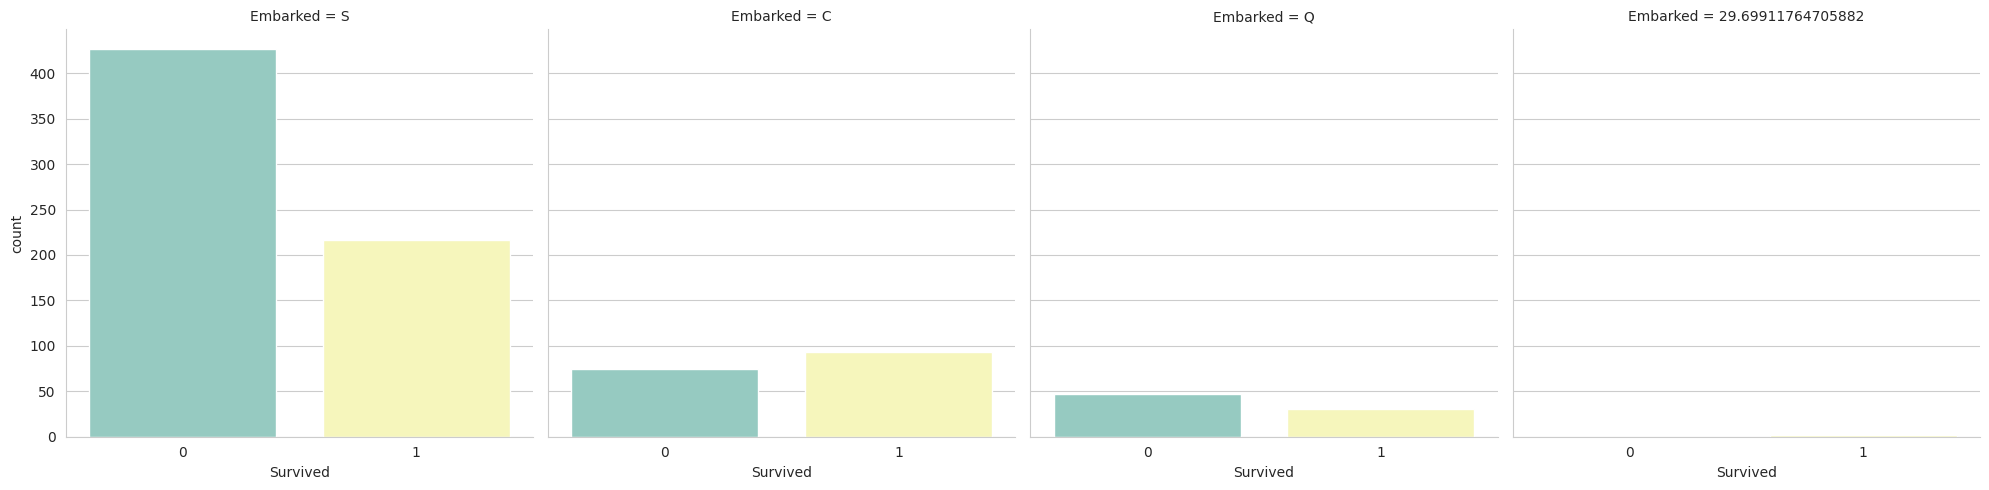

In [ ]:
plt.figure(figsize=(12, 3))
sns.set_style('whitegrid')
sns.catplot(x='Survived', col='Embarked', kind='count', data=data,palette="Set3");
plt.show()

<Figure size 1200x300 with 0 Axes>

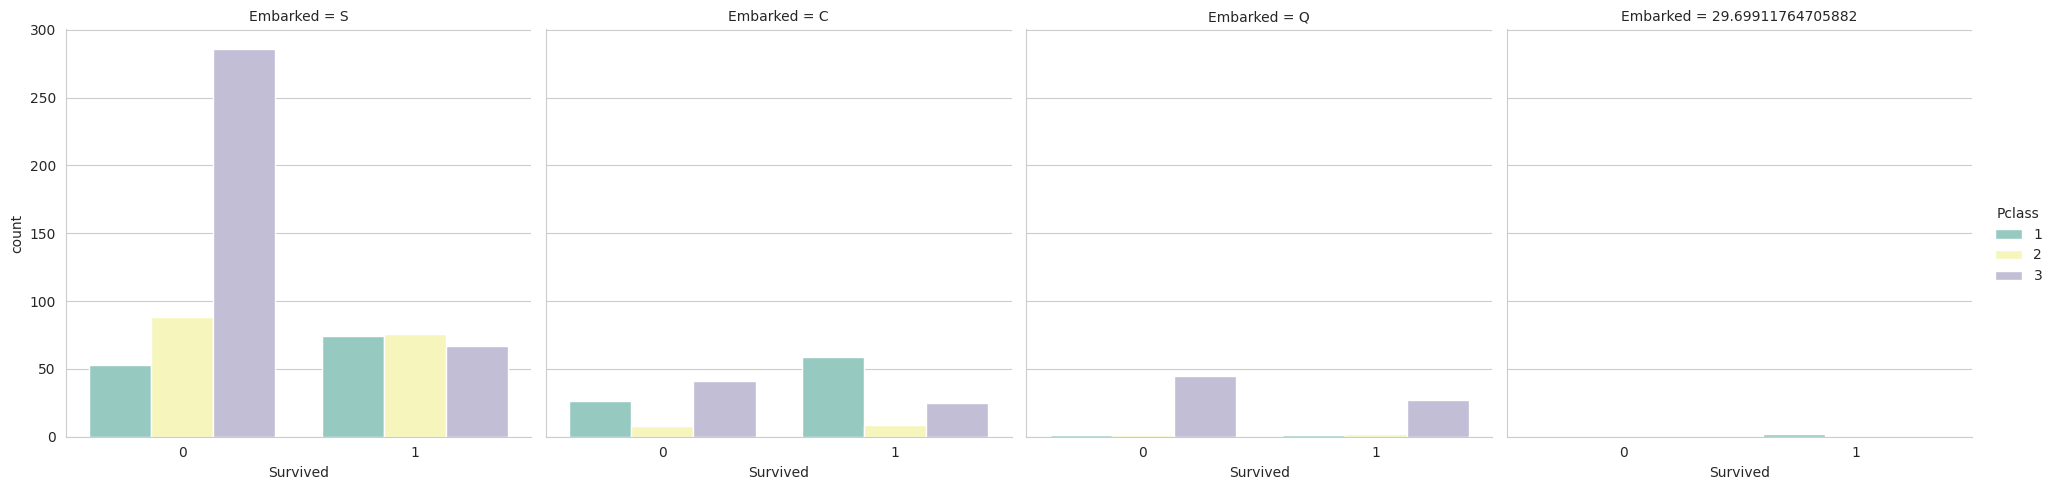

In [ ]:
plt.figure(figsize=(12, 3))
sns.set_style('whitegrid')
sns.catplot(x='Survived', col='Embarked', hue = 'Pclass', kind='count', data=data,palette="Set3");
plt.show()

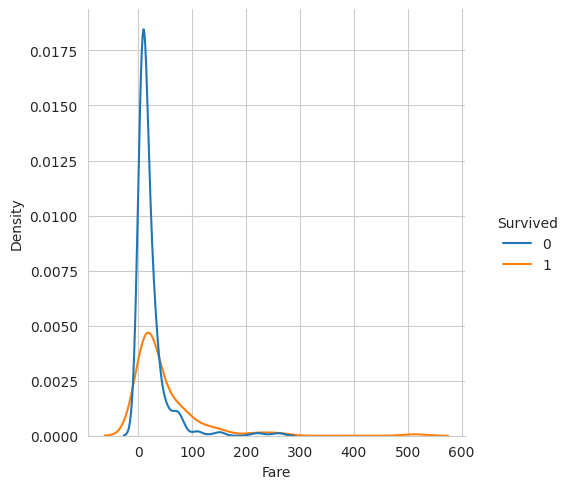

In [ ]:
# Distribution of Survival or not Survival based on the Fare
sns.displot(data=data, x="Fare",hue='Survived',kind ='kde')

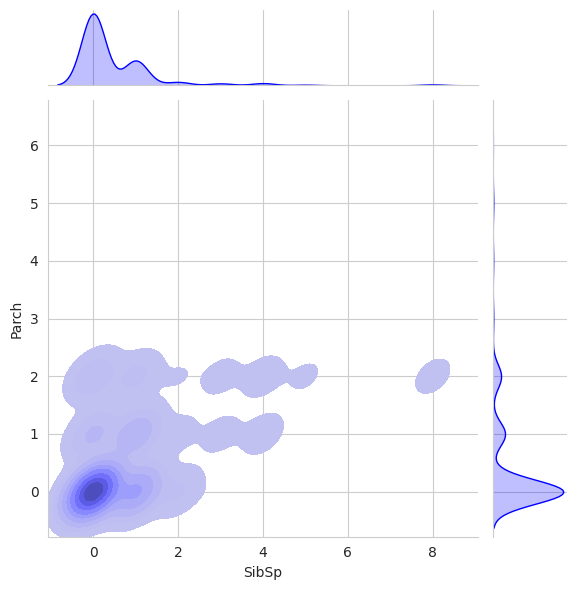

In [ ]:
sns.jointplot(x='SibSp',y='Parch',data=data,color='blue',kind='kde', fill =True)

Text(0.5, 1.0, 'Age over Pclass')

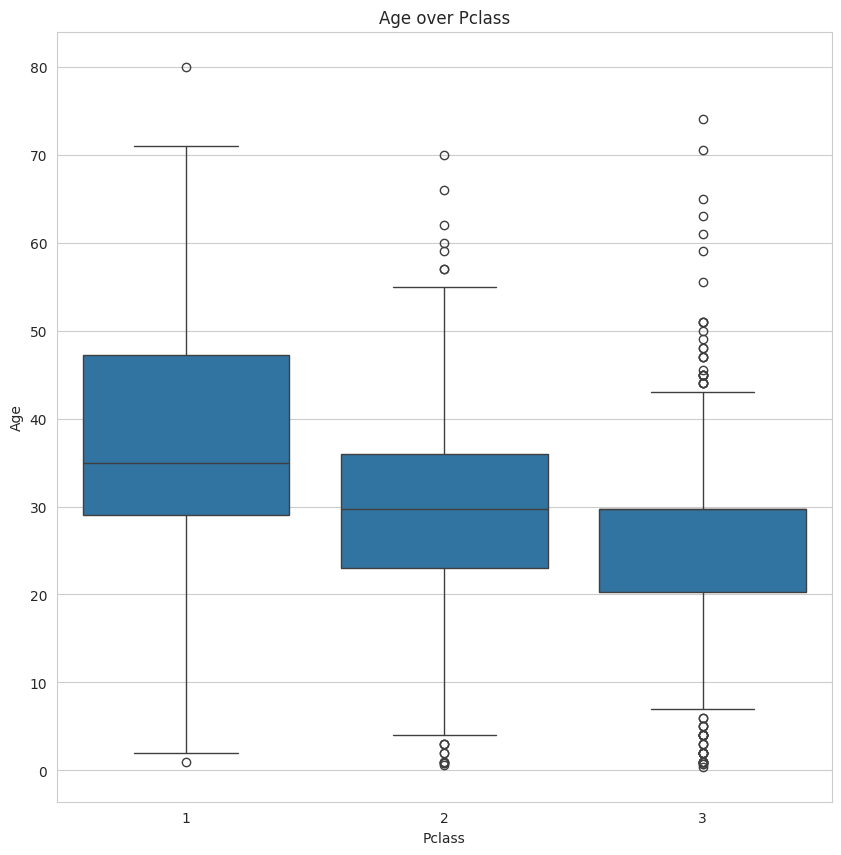

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='Pclass',y='Age',data=data)
plt.title('Age over Pclass')

In [ ]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


## Feature Engineering and Selection
This section focuses on preparing the dataset for model training by selecting and encoding features.

In [ ]:
# Dropping less important features for this data
data = data.drop(['PassengerId','Ticket','Name'],axis =1)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [ ]:
# Converts categorical variables into dummy/indicator variables.
data = pd.get_dummies(data, columns = ['Sex'], drop_first=True)
data = pd.get_dummies(data, columns = ['Embarked'], drop_first=True)

# Cast one-hot encoded columns to float
for col in ['Sex_male','Sex_female','Embarked_C', 'Embarked_Q', 'Embarked_S']:  # Replace with actual column names
    if col in data.columns:
        data[col] = data[col].astype(float)

In [ ]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,1.0,0.0,0.0,1.0
1,1,1,38.000000,1,0,71.2833,0.0,1.0,0.0,0.0
2,1,3,26.000000,0,0,7.9250,0.0,0.0,0.0,1.0
3,1,1,35.000000,1,0,53.1000,0.0,0.0,0.0,1.0
4,0,3,35.000000,0,0,8.0500,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1.0,0.0,0.0,1.0
887,1,1,19.000000,0,0,30.0000,0.0,0.0,0.0,1.0
888,0,3,29.699118,1,2,23.4500,0.0,0.0,0.0,1.0
889,1,1,26.000000,0,0,30.0000,1.0,1.0,0.0,0.0


In [ ]:
# Splitting the Data into Training and Testing Sets
X_train = data.drop(['Survived'],axis =1)
y_train = data['Survived']

##  Machine Learning Model
This section includes training the machine learning model, making predictions, and evaluating the model.

In [ ]:
# Training the Model using Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size = 0.2,random_state = 42)

In [ ]:
# Fit the model in traning data
lg_regression = LogisticRegression(max_iter = 3000)
lg_regression.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [ ]:
# Makes predictions on the test set using the trained Logistic Regression model.
y_pred = lg_regression.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [ ]:
# Evaluating Model Performance: Accuracy Score, Confusion Matrix and Classification report
accuracy_of_model = accuracy_score(y_test,y_pred)
confusion_matrix_of_model = confusion_matrix(y_test,y_pred)
classification_report_of_model = classification_report(y_test,y_pred)
print(accuracy_of_model)
print(confusion_matrix_of_model)

0.8100558659217877
[[90 15]
 [19 55]]


In [ ]:
print(classification_report_of_model)

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



## Model Summary
The logistic regression model was trained to predict survival on the Titanic dataset, achieving an accuracy of 81.01%. The confusion matrix shows that the model correctly predicted 90 non-survivors and 55 survivors, while misclassifying 15 non-survivors and 19 survivors. The precision and recall scores indicate that the model performs well, particularly in identifying non-survivors, with a slightly lower performance in predicting survivors. Overall, the model demonstrates good predictive capability, with balanced precision, recall, and F1-scores across both classes.